# EDA - House Rocket Insights Project

## 0.0. IMPORTS

In [1]:
import math
import pandas  as pd
import numpy   as np
import seaborn as sns

from IPython.core.display  import HTML
from matplotlib            import pyplot as plt

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = (20,8)
    plt.rcParams['font.size'] = 25
    
    display( HTML( '<style>.container { width:90% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    
    sns.set()
    sns.set_theme(style = 'darkgrid', font_scale = 2)
    sns.set_style("darkgrid")
    sns.set(rc={'figure.figsize':(20,8)})

jupyter_settings()
    
def numerical_attributes(data):
    num_attributes = data.select_dtypes(include=['int64', 'float64'])
    
    # Central tendency = mean, median
    ct1 = pd.DataFrame(num_attributes.apply( np.mean) )
    ct2 = pd.DataFrame(num_attributes.apply( np.median) )

    # Dispersion = std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame( num_attributes.apply( np.std ) )
    d2 = pd.DataFrame( num_attributes.apply( min ) )
    d3 = pd.DataFrame( num_attributes.apply( max ) )
    d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) )
    d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) )
    d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) )

    # Concatenate
    m = pd.concat( [d2, d3, ct1, ct2, d1, d5, d6], axis=1 ).reset_index()
    m.columns = ['attributes', 'min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis']

    return m

## 0.2. Loading Data

In [3]:
df_raw = pd.read_csv('../datasets/transformed_data_2.csv', low_memory=False)

In [4]:
df3 = df_raw.copy()

In [5]:
df3.head().T

,0,1,2,3,4
id,7129300520,4060000240,4058801670,2976800796,6874200960
date,2014-10-13,2014-06-23,2014-07-17,2014-09-25,2015-02-27
price,221900.000,205425.000,445000.000,236000.000,170000.000
bedrooms,3,2,3,3,2
bathrooms,1.000,1.000,2.250,1.000,1.000
sqft_living,1180,880,2100,1300,860
sqft_lot,5650,6780,8201,5898,5265
floors,1.000,1.000,1.000,1.000,1.000
waterfront,0,0,0,0,0
view,0,0,2,0,0


## 3.0. HYPOTHESIS TESTING

## 2.1. Hypothesis List

### **1.** Houses with no waterfront view are 30% cheaper on average.

**False.** Houses with no waterfront view are 68% cheaper than the ones that have that attribute.

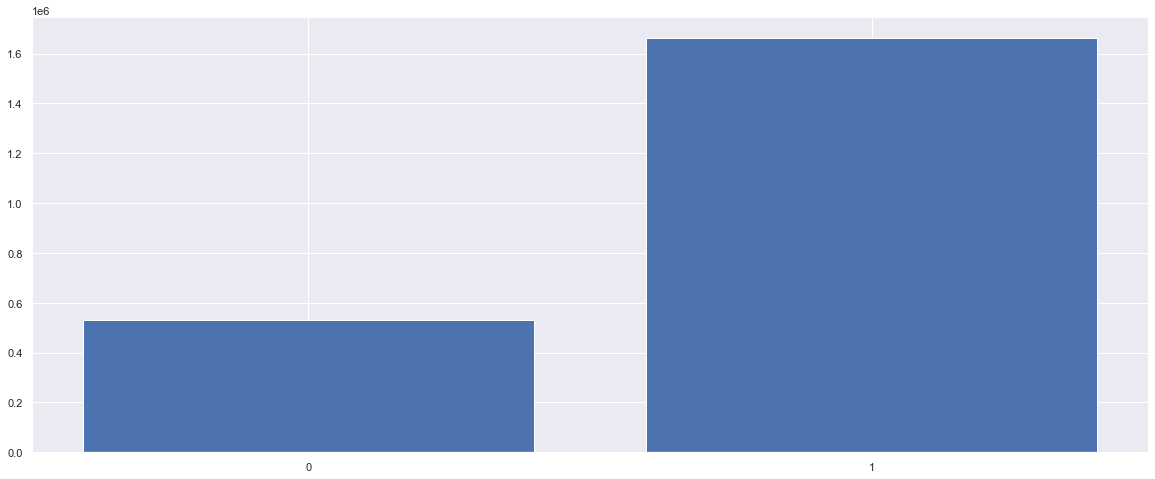

In [6]:
# Barplot comparing the houses with waterfront or not
aux1 = df3[['price','waterfront']].groupby('waterfront').mean().reset_index()
plt.bar(aux1['waterfront'].astype(str),aux1['price'])
plt.show()

In [7]:
# Comparing in percents the price difference between houses with waterfront or no
decimal_number = (aux1.loc[1].sum() - aux1.loc[0].sum()) / aux1.loc[1].sum()
percentage = f"{decimal_number:.0%}"
percentage

'68%'

### **2.** Houses built before 1965 are 50% cheaper on average.

**False.** Older houses are just 7% cheaper than the new ones on average.

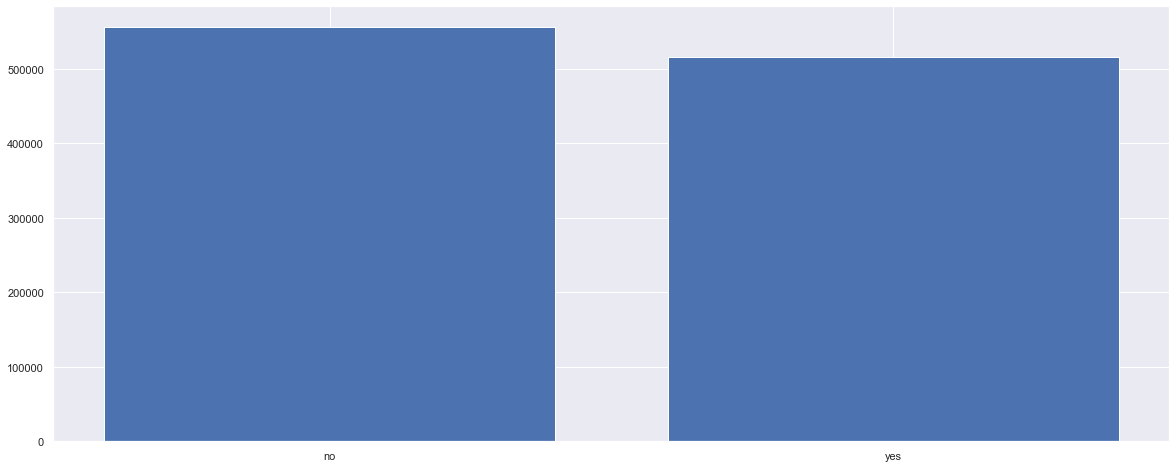

In [8]:
aux2 = df3[['price','old']].groupby('old').mean().reset_index()
plt.bar(aux2['old'],aux2['price'])
plt.show()

In [9]:
# Comparing in percents the price difference between houses with waterfront or no
decimal_number = (aux2.iloc[0,1].sum() - aux2.iloc[1,1].sum()) / aux2.iloc[0,1].sum()
percentage = f"{decimal_number:.1%}"
percentage

'7.2%'

### **3.** Houses without basement have lot size 40% bigger than houses with basement.

**Partially Correct.** Houses without basement have lot size 18% bigger than houses with basement.

In [10]:
# Create a column to find if a building has a basement
df3['basement'] = df3['sqft_basement'].apply(lambda x: 'yes' if x > 0 else 'no')
df3['basement'] = df3['basement'].apply(str)

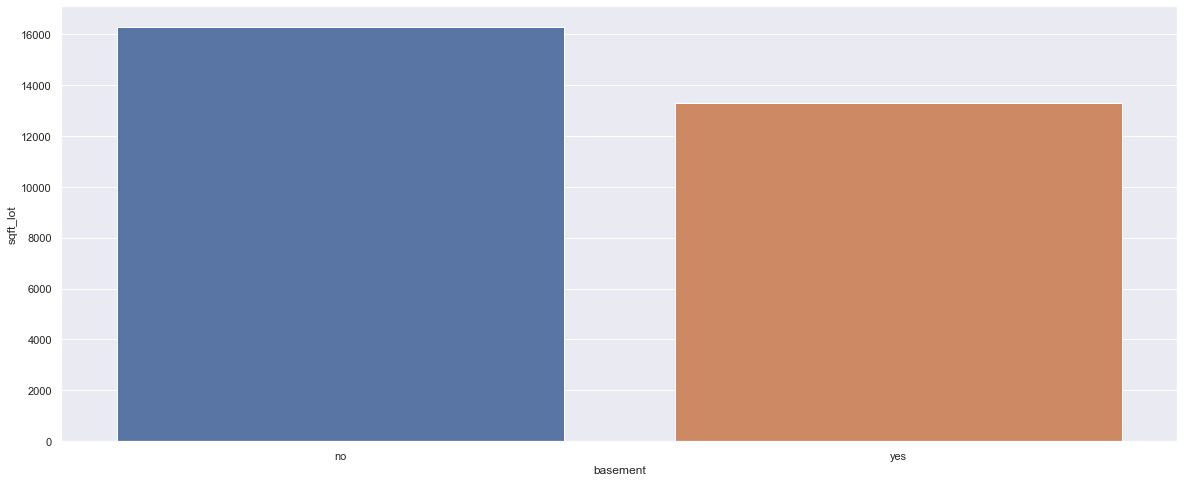

In [11]:
aux3 = df3[['basement', 'sqft_lot']].groupby('basement').mean().reset_index()
sns.barplot(x = 'basement', y = 'sqft_lot', data = aux3);

In [12]:
# Comparing in percents the price difference between houses with waterfront or no
decimal_number = (aux3.iloc[0,1].sum() - aux3.iloc[1,1].sum()) / aux3.iloc[0,1].sum()
percentage = f"{decimal_number:.1%}"
percentage

'18.3%'

### **4.** Related to the houses year of built, there is a price increase of 10% YoY.

**False.** There is not a constant increase of average price of houses over the years.

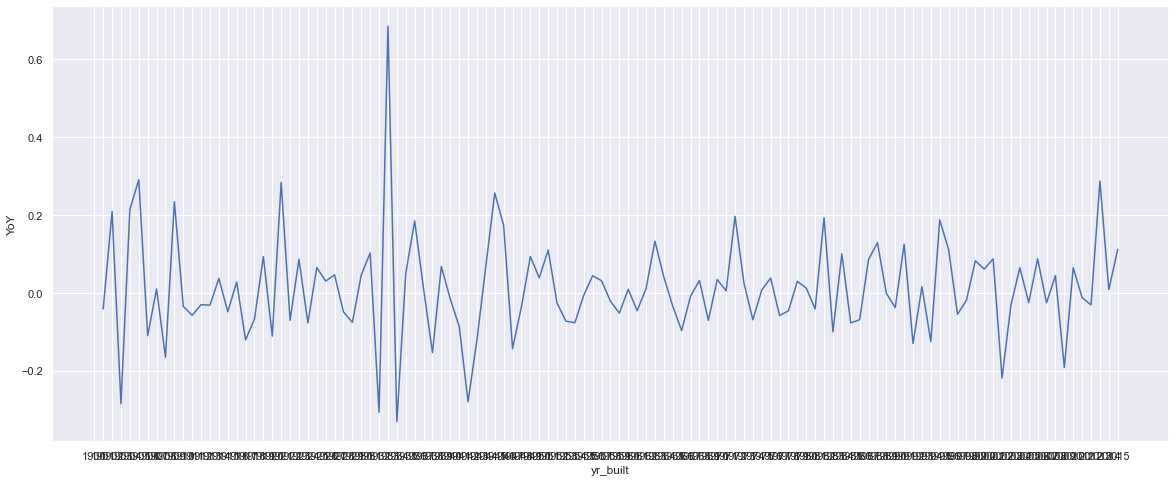

In [13]:
df3['yr_built'] = df3['yr_built'].astype(str)
aux4 = df3[['price','yr_built']].groupby('yr_built').mean().reset_index()
aux4['YoY'] = aux4['price'].pct_change()
sns.lineplot(data=aux4, x='yr_built', y='YoY');

### **5.** Related to the date, houses with 3 bathrooms have a price increase of 15% MoM.

**False.** There is a average price decrease round 15% of houses with 3 bathrooms from June, 2014 to May, 2015. 

In [14]:
# Creating a column to get the year and month from datetime
df3['date'] = pd.to_datetime(df3['date'])
df3['year-month'] = df3['date'].dt.to_period('M')

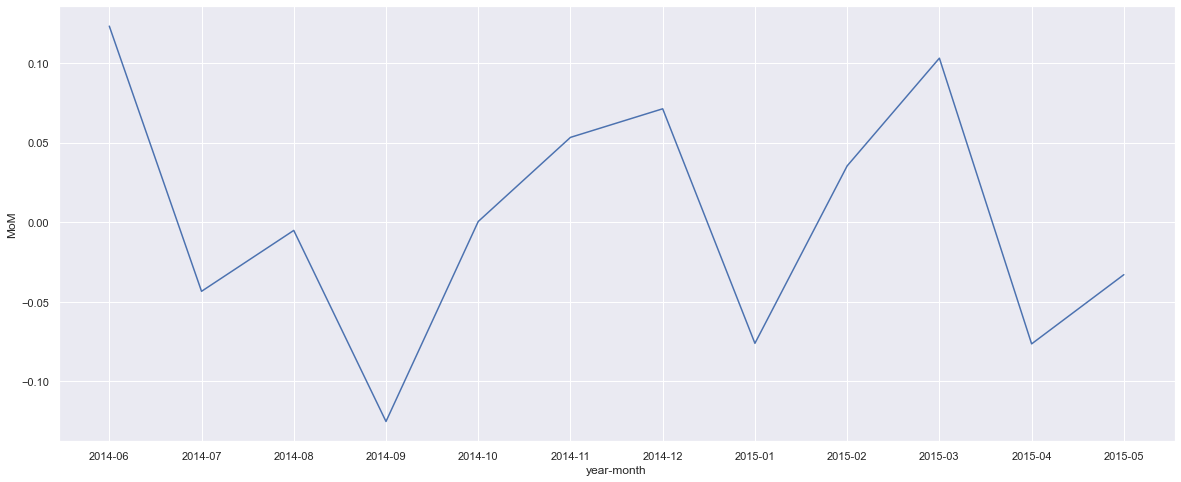

In [65]:
aux5 = df3.loc[df3['bathrooms'] == 3]
aux5 = aux5[['price','year-month']].groupby('year-month').mean().reset_index()
aux5['MoM'] = aux5['price'].pct_change()
aux5['year-month'] = aux5['year-month'].astype(str)
sns.lineplot(data=aux5, x='year-month', y='MoM');

### **6.** The median of houses which has more than 5 bedrooms is 25% more expensive than those which have less than it, comparing by the same size.

**False.** Excepting the tiny houses ones, in the another cases the difference of prices between these two groups is small. Furthermore, in the medium and small houses, the median of the houses with more than 5 bedrooms are slightly smaller.

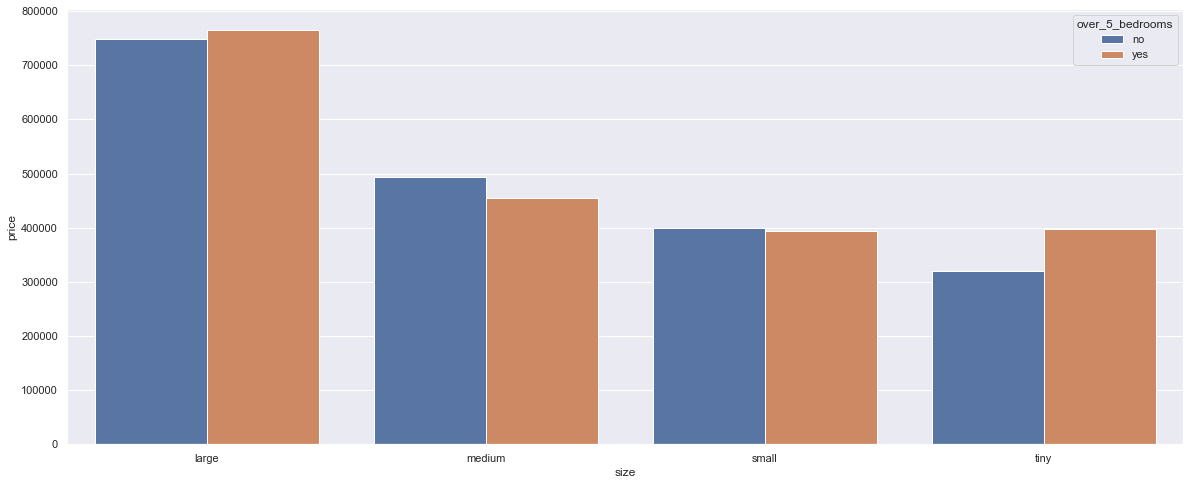

In [64]:
df3['over_5_bedrooms'] = df3['bedrooms'].apply(lambda x: 'yes' if x >=5 else 'no')
aux6 = df3[['price','size','over_5_bedrooms']].groupby(['size','over_5_bedrooms']).median().reset_index()
sns.barplot(x='size', y='price', hue='over_5_bedrooms', data=aux6);

### **7.** Houses built before 1965 which were renovated are 40% more expensive than the houses not renovated from this period of time.

**True.** Old houses that were renovated are almost 34% more expensive on average.

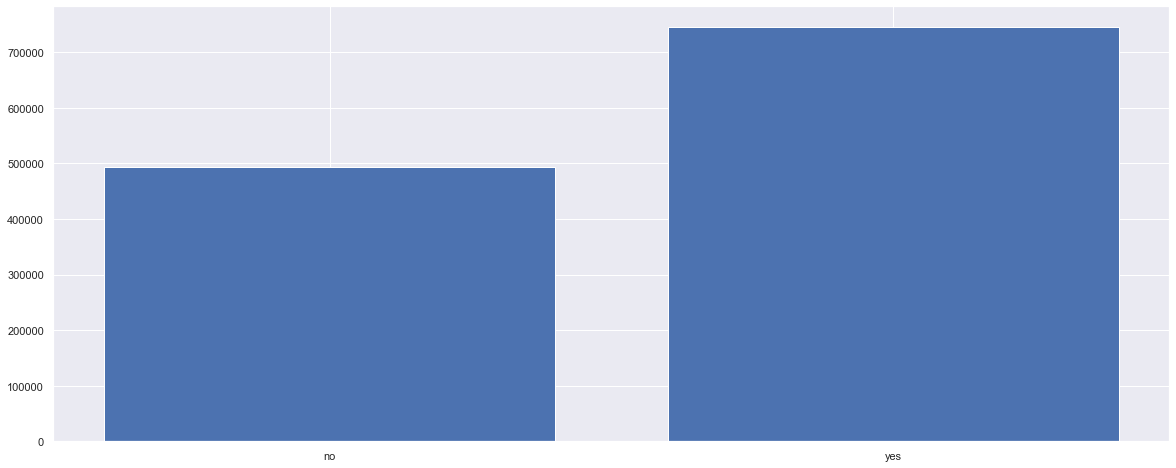

In [34]:
df3['is_renovated'] = df3['yr_renovated'].apply(lambda x: 'yes' if x > 0 else 'no')
aux7 = df3.loc[df3['old'] == 'yes'][['price','is_renovated']].groupby('is_renovated').mean().reset_index()
plt.bar(aux7['is_renovated'],aux7['price'])
plt.show()

In [40]:
# Comparing in percents the price difference between houses with waterfront or no
decimal_number = (aux7.iloc[1,1].sum() - aux7.iloc[0,1].sum()) / aux7.iloc[1,1].sum()
percentage = f"{decimal_number:.1%}"
percentage

'33.8%'

### **8.** Houses on zipcode that has the biggest median of prices represents 70% of the total houses price.

**False.** The zipcode with the biggest median of prices represents 2,2% of the total houses price.

In [55]:
# Getting the zipcode with the biggest price median
aux8 = df3[['price','zipcode']].groupby('zipcode').median().reset_index()
aux8['zipcode'] = aux8['zipcode'].apply(str)
#aux8.sort_values(by='price', ascending = False)
aux8.max()

zipcode         98199
price     1892500.000
dtype: object

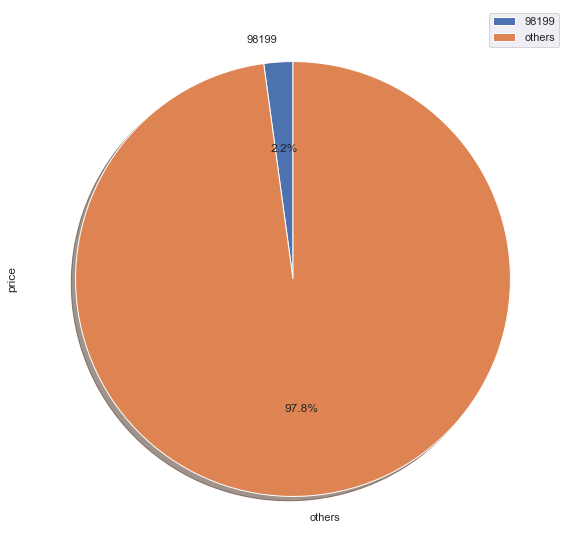

In [63]:
# Creating a pie chart to compare values
aux9 = df3[['price','zipcode']].groupby('zipcode').sum().reset_index()
aux9['zipcode'] = aux9['zipcode'].apply(str)
aux9['biggest_zipcode'] = aux9['zipcode'].apply(lambda x: '98199' if x == '98199' else 'others')
aux9.groupby(['biggest_zipcode']).sum().plot(kind='pie', y='price', subplots=True, shadow = True,startangle=90,
                                             figsize=(15,10), autopct='%1.1f%%');

### **9.** Houses on zipcode that has the biggest median of prices correspond to 5% of the houses on sale.

**False.** The zipcode with the biggest median of prices represents 1,5% of the total houses on sale.

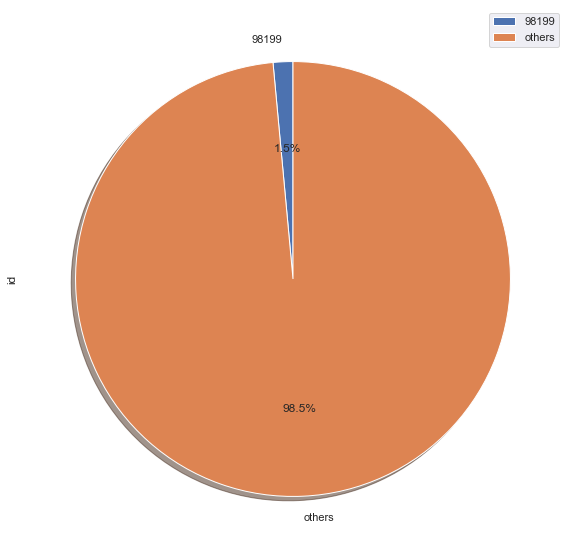

In [69]:
aux10 = df3[['id','zipcode']].groupby('zipcode').count().reset_index()
aux10['zipcode'] = aux10['zipcode'].apply(str)
aux10['biggest_zipcode'] = aux10['zipcode'].apply(lambda x: '98199' if x == '98199' else 'others')
aux10.groupby(['biggest_zipcode']).sum().plot(kind='pie', y='id', subplots=True, shadow = True,startangle=90,
                                             figsize=(15,10), autopct='%1.1f%%');

### **10.** Houses renovated in the last 10 years are on average 50% more valuable than the ones which had renovated more than 10 years before 2015.

**False.** The prices between houses renovated in the last 10 years are almost equal than the ones that were renovated before

C:\Users\nelio\AppData\Local\Temp\ipykernel_25672\668041482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux11['renovated_group'] = aux11['yr_renovated'].apply(lambda x: '< 10 years' if 2015-x <= 10 else '> 10 years')


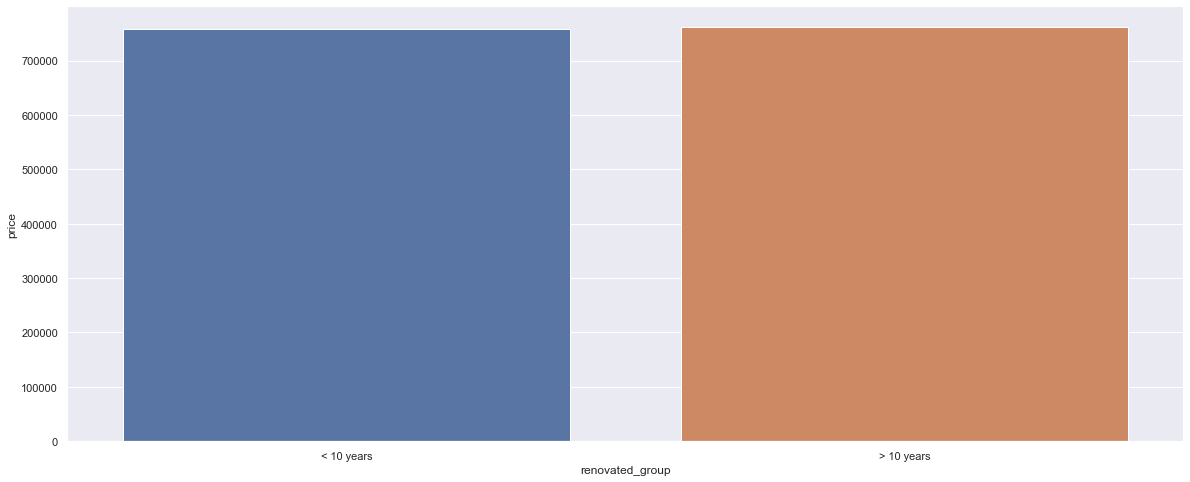

In [79]:
aux11 = df3.loc[df3['yr_renovated'] > 0,:]
aux11['renovated_group'] = aux11['yr_renovated'].apply(lambda x: '< 10 years' if 2015-x <= 10 else '> 10 years')
aux11 = aux11[['price', 'renovated_group']].groupby('renovated_group').mean().reset_index()
sns.barplot(x='renovated_group', y='price', data=aux11);